In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import saltswap.analysis_tools as atools

## Notebook to explore how varying the chemical potential affects salt concentration

This is exploritary work, with the primary aim of establishing the stability of `saltswap`. The results below are for very short runs with the simulation details found in the `submit` script that accompanies this notebook. 

## Timeseries plots
Viewing how the number of salt pairs varies over the simulation.

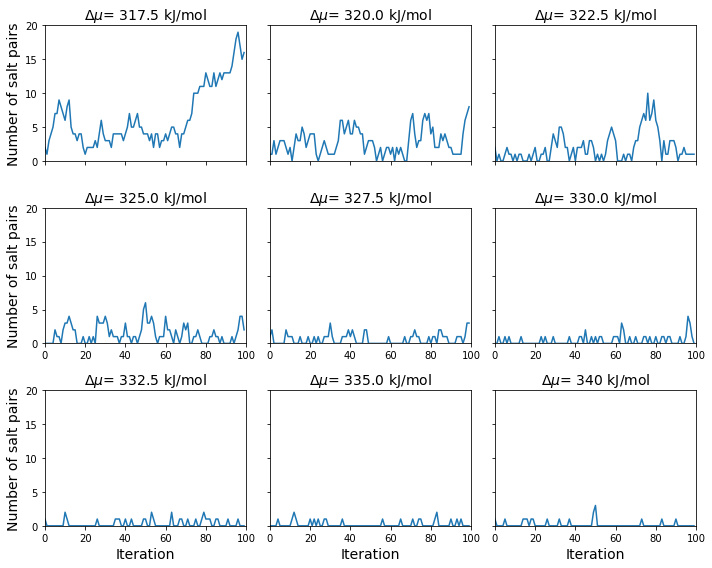

In [2]:
potentials = [317.5, 320.0, 322.5, 325.0, 327.5, 330.0, 332.5, 335.0, 340]
coords = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]

f, axarr = plt.subplots(3, 3)
for p, c in zip(potentials, coords):
    filename = 'potential_{0}/data.txt'.format(p)
    nwats, nsalt, accprob, time = atools.read_data(filename)
    
    if p == 820:
        col='red'
    else:
        col='C0'
    
    axarr[c].plot(nsalt, color=col)
    axarr[c].set_ylim((0,20))
    axarr[c].set_xlim((0,100))
    axarr[c].set_title('$\Delta\mu$= {} kJ/mol'.format(p), fontsize=14)

## Tidy up the axis labels
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False) 
plt.setp([a.get_yticklabels() for a in axarr[:, 2]], visible=False)  
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)  

for a in axarr[:,0]: a.set_ylabel('Number of salt pairs', fontsize=14) 
for a in axarr[2,:]: a.set_xlabel('Iteration', fontsize=14) 

f.set_figheight(8)
f.set_figwidth(10)

plt.tight_layout()
plt.show()

## View titration

Seeing how the average number of salt pairs varies as a function of the chemical potential. The relationship between the two should be monotonic.

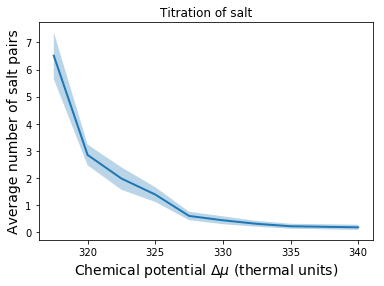

In [3]:
potentials = [317.5, 320.0, 322.5, 325.0, 327.5, 330.0, 332.5, 335.0, 340]
ave_salt = []
stderr = []
for p in potentials:
    filename = 'potential_{0}/data.txt'.format(p)
    nwats, nsalt, accprob, time = atools.read_data(filename)
    ave_salt.append(np.mean(nsalt))
    stderr.append(2.0 * np.std(nsalt) / np.sqrt(len(nsalt)))   
    

ave_salt = np.array(ave_salt)
stderr = np.array(stderr)
delta_chem = np.array(potentials)

# Plotting
upper = ave_salt + stderr
lower = ave_salt - stderr
plt.plot(delta_chem, ave_salt, lw=2)
plt.fill_between(delta_chem, lower, upper, alpha=0.3)

plt.title('Titration of salt')
plt.xlabel('Chemical potential $\Delta\mu$ (thermal units)', fontsize=14)
plt.ylabel('Average number of salt pairs', fontsize=14)
plt.show()

Plot looks good, and merits further work with these simulations.